# Patient Classification and Recommendation System

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette(palette='plasma')


In [6]:
df = pd.read_csv("PatientCare.csv")
df.head()
# Source is the target column in which 1 == "patient under Care" and 0 == "Patient Not Under Care"

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,F,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,M,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,F,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,F,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,M,0


In [7]:
# Checking Null Values
df.isnull().sum()
# In Dataset there is No Null values present

HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
MCV             0
AGE             0
SEX             0
SOURCE          0
dtype: int64

In [8]:
# Checking Inforamtion and datatype of the columns
df.info()
# In Dataset there is One categorical Columns and other's are Numercial 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3309 entries, 0 to 3308
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   3309 non-null   float64
 1   HAEMOGLOBINS  3309 non-null   float64
 2   ERYTHROCYTE   3309 non-null   float64
 3   LEUCOCYTE     3309 non-null   float64
 4   THROMBOCYTE   3309 non-null   int64  
 5   MCH           3309 non-null   float64
 6   MCHC          3309 non-null   float64
 7   MCV           3309 non-null   float64
 8   AGE           3309 non-null   int64  
 9   SEX           3309 non-null   object 
 10  SOURCE        3309 non-null   int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 284.5+ KB


In [9]:
# Checking Description of the Dataset
df.describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SOURCE
count,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000
mean,38.226111,12.749350,4.544802,8.715533,258.893019,28.230039,33.336476,84.611333,46.644303,0.398005
std,5.971943,2.084325,0.784510,4.991299,112.676139,2.696520,1.247055,6.916079,21.874106,0.489561
min,13.700000,3.800000,1.480000,1.100000,10.000000,14.900000,26.000000,54.000000,1.000000,0.000000
25%,34.300000,11.400000,4.040000,5.700000,191.000000,27.200000,32.700000,81.500000,29.000000,0.000000
50%,38.700000,12.900000,4.580000,7.600000,257.000000,28.700000,33.400000,85.300000,48.000000,0.000000
75%,42.500000,14.200000,5.060000,10.300000,322.000000,29.800000,34.100000,88.800000,64.000000,1.000000
max,69.000000,18.900000,7.860000,76.600000,1121.000000,40.800000,38.400000,115.600000,99.000000,1.000000


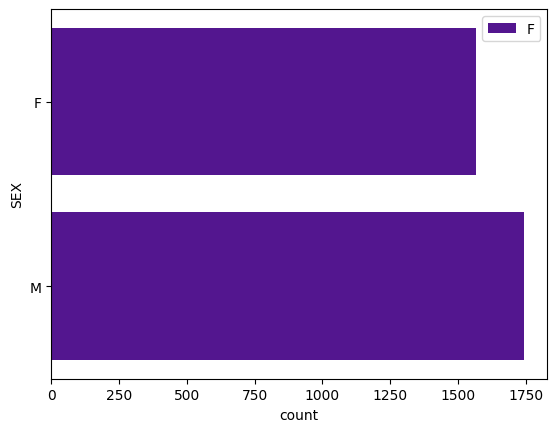

In [13]:
## Performing EDA on the Dataset
# Checking Total Count of Male and Female

sns.countplot(data=df, y = df['SEX'])
plt.legend(df['SEX'])



SOURCE
0    1992
1    1317
Name: count, dtype: int64


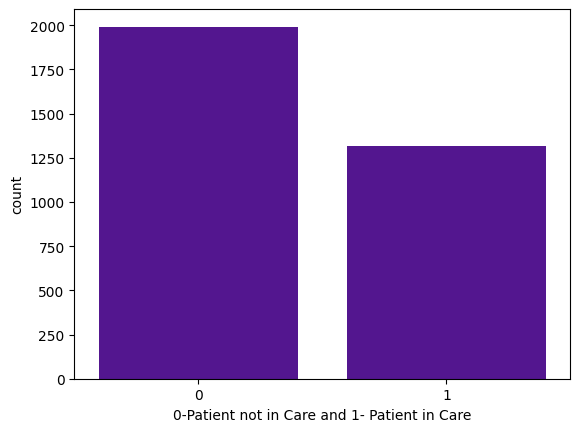

In [18]:
# Checking Total Count of patient in care and Patient not in care

sns.countplot(data = df,x = df['SOURCE'])
plt.xlabel("0-Patient not in Care and 1- Patient in Care")
print(df['SOURCE'].value_counts())

# The Target value contain data in ratio of 60% Patient Not in Care and 40% Patient in Care 

The Average Value of HAEMATOCRIT in Male and Female
SEX
F    36.490421
M    39.785542
Name: HAEMATOCRIT, dtype: float64


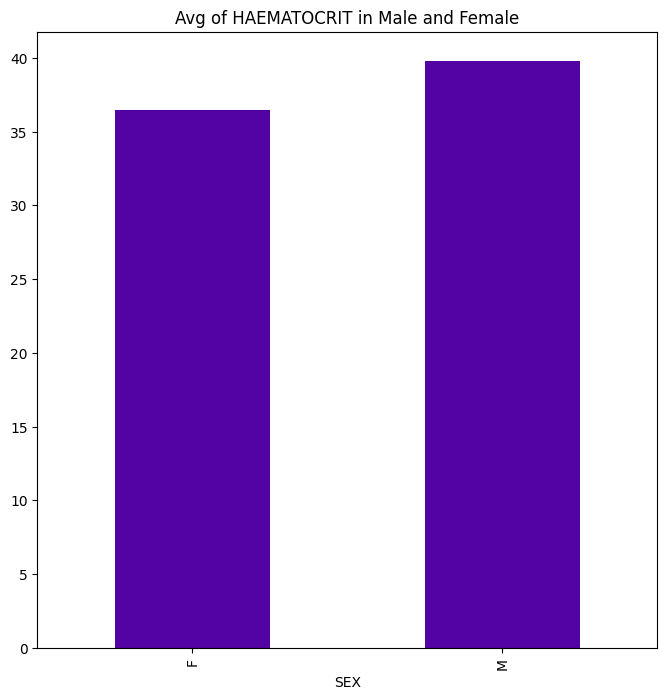

The Average Value of HAEMOGLOBINS in Male and Female
SEX
F    12.063729
M    13.365347
Name: HAEMOGLOBINS, dtype: float64


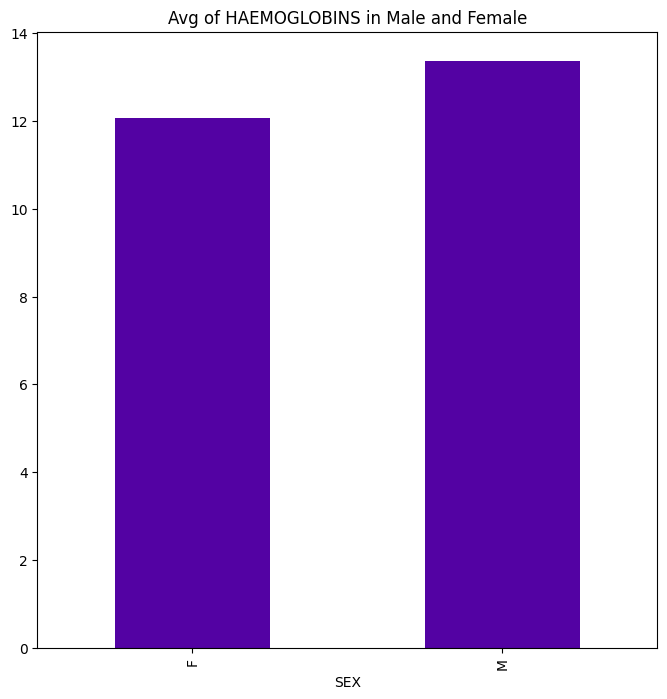

The Average Value of ERYTHROCYTE in Male and Female
SEX
F    4.342018
M    4.726994
Name: ERYTHROCYTE, dtype: float64


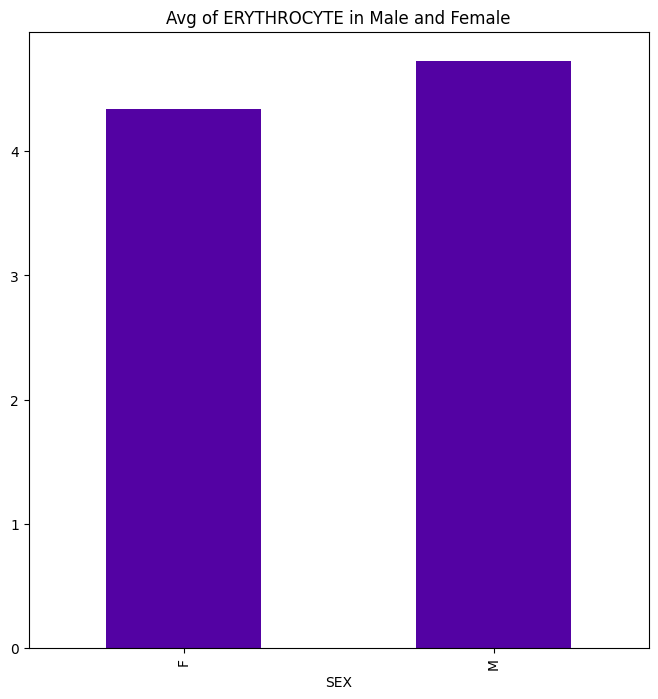

The Average Value of LEUCOCYTE in Male and Female
SEX
F    8.504981
M    8.904705
Name: LEUCOCYTE, dtype: float64


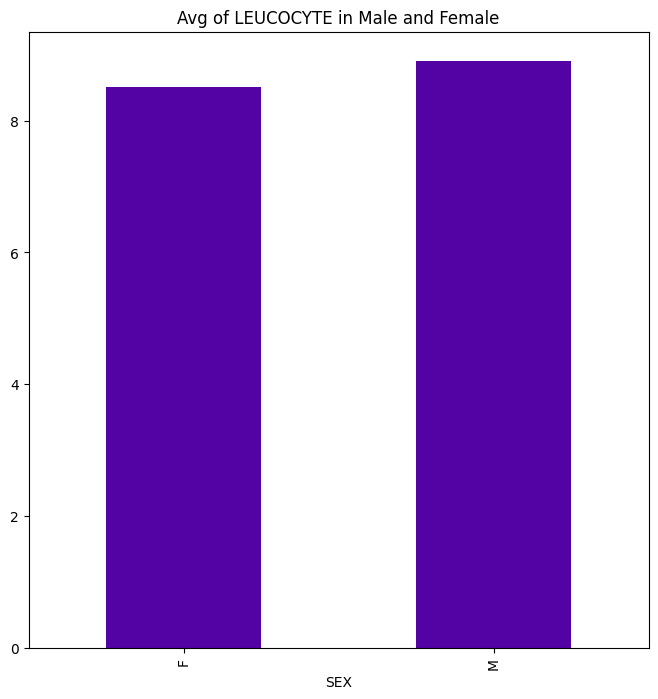

The Average Value of THROMBOCYTE in Male and Female
SEX
F    267.049170
M    251.565118
Name: THROMBOCYTE, dtype: float64


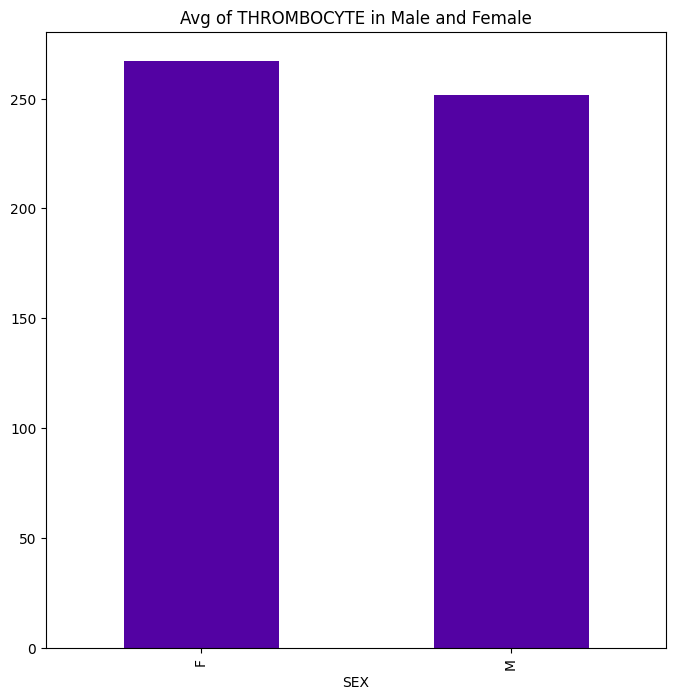

The Average Value of MCH in Male and Female
SEX
F    27.991699
M    28.444177
Name: MCH, dtype: float64


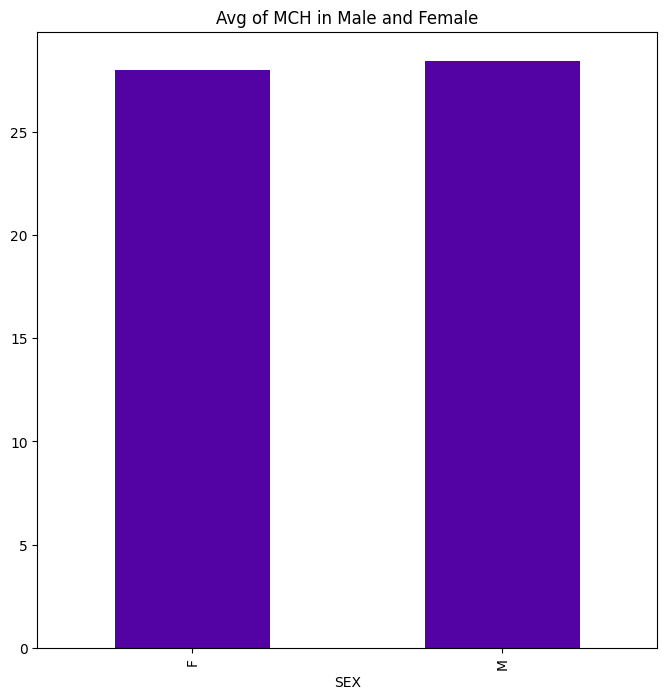

The Average Value of MCHC in Male and Female
SEX
F    33.047382
M    33.596213
Name: MCHC, dtype: float64


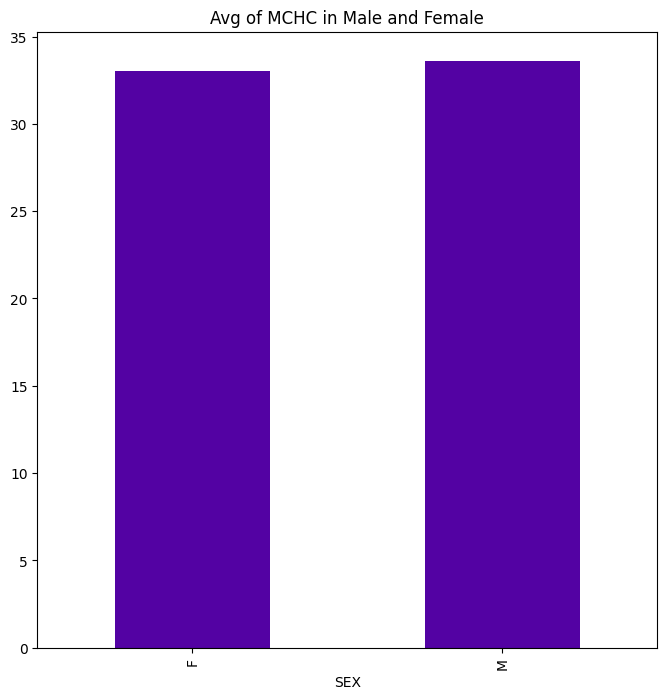

The Average Value of MCV in Male and Female
SEX
F    84.610153
M    84.612392
Name: MCV, dtype: float64


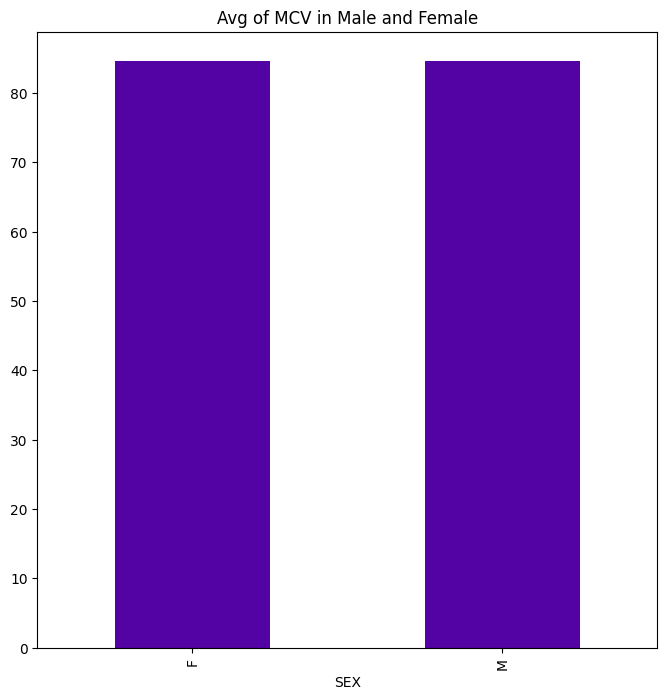

The Average Value of AGE in Male and Female
SEX
F    46.269476
M    46.981067
Name: AGE, dtype: float64


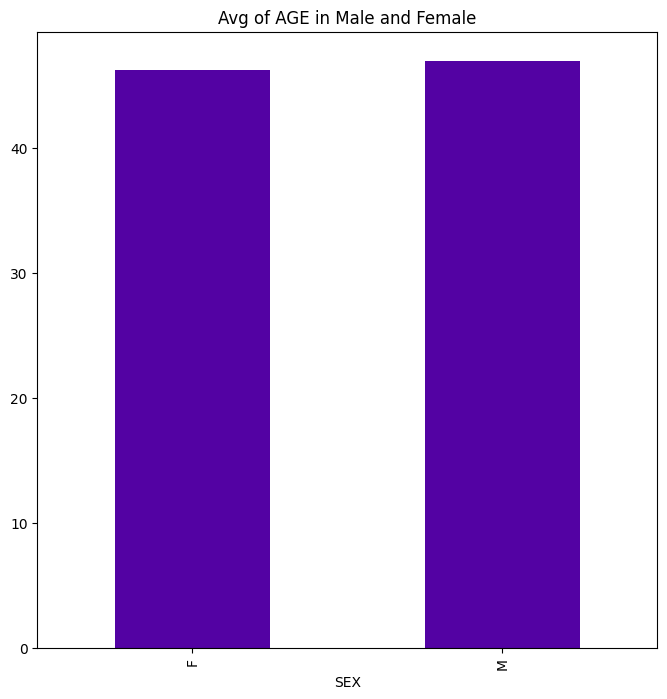

In [31]:
# Checking average Parameter's Values IN Male and Female
for i in df.drop(columns = ['SEX','SOURCE']).columns:
    print("The Average Value of {} in Male and Female".format(i))
    print(df.groupby(['SEX'])[i].mean())
    plt.figure(figsize = (8,8))
    plt.title('Avg of {} in Male and Female'.format(i))
    df.groupby(['SEX'])[i].mean().plot(kind='bar')
    plt.show()




The Distribution of HAEMATOCRIT


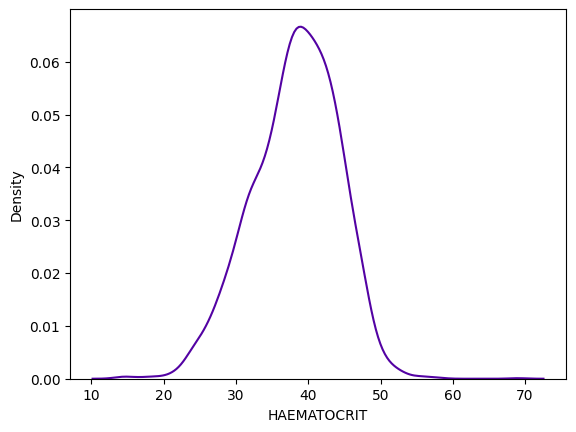

The Distribution of HAEMOGLOBINS


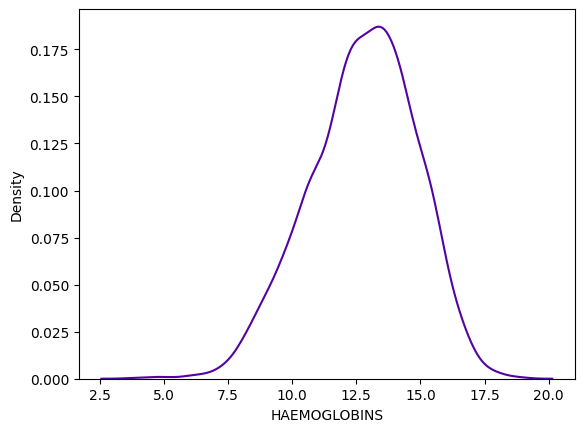

The Distribution of ERYTHROCYTE


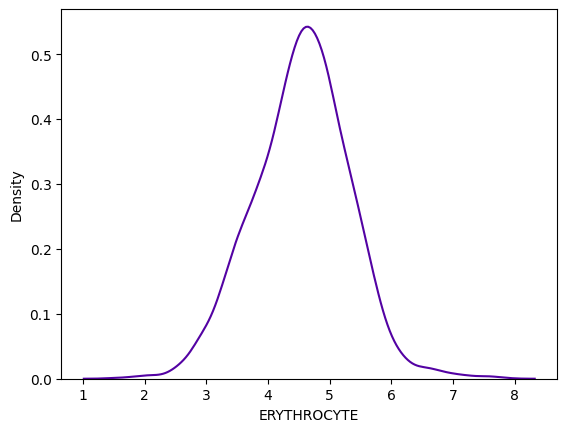

The Distribution of LEUCOCYTE


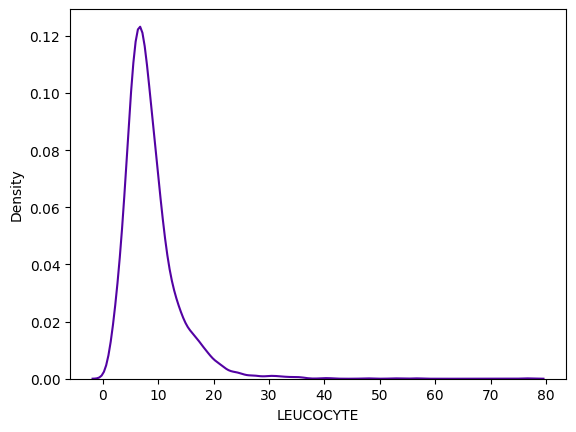

The Distribution of THROMBOCYTE


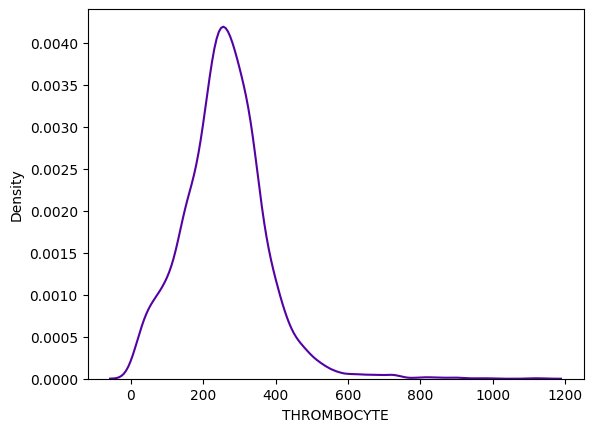

The Distribution of MCH


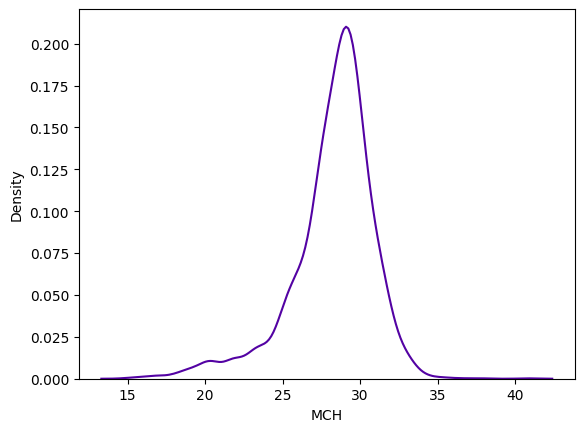

The Distribution of MCHC


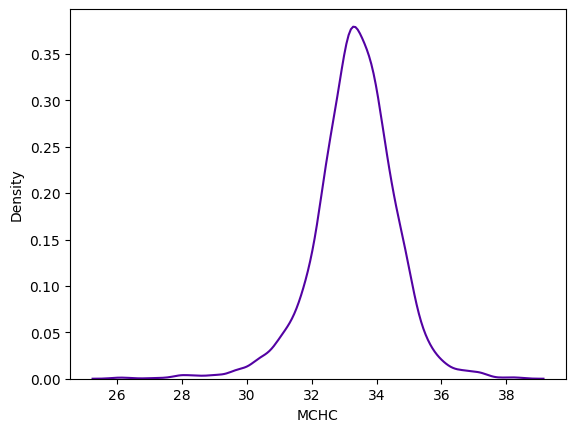

The Distribution of MCV


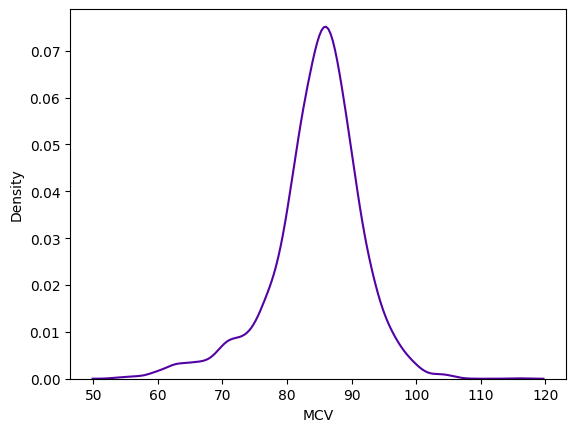

The Distribution of AGE


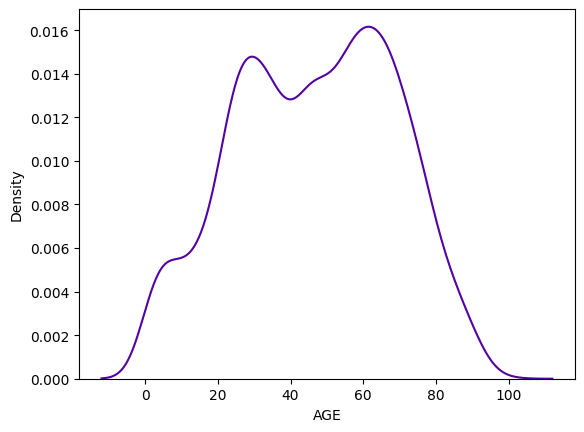

In [37]:
# Checking Distribution of the Data

for i in df.drop(columns = ['SEX','SOURCE']):
    print("The Distribution of {}".format(i))
    sns.kdeplot(df[i])
    plt.show()


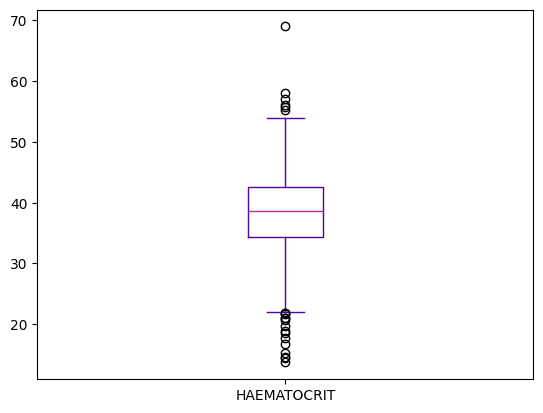

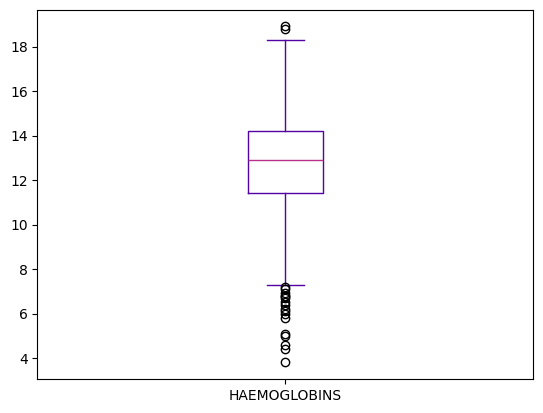

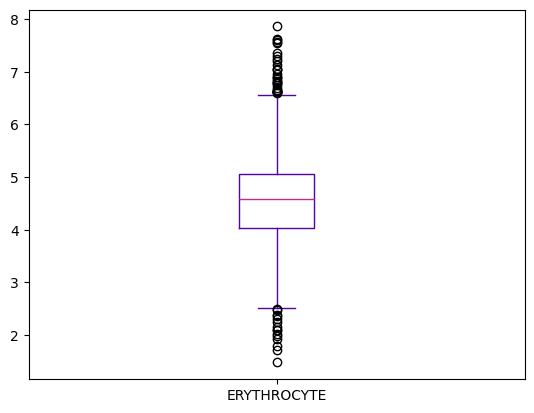

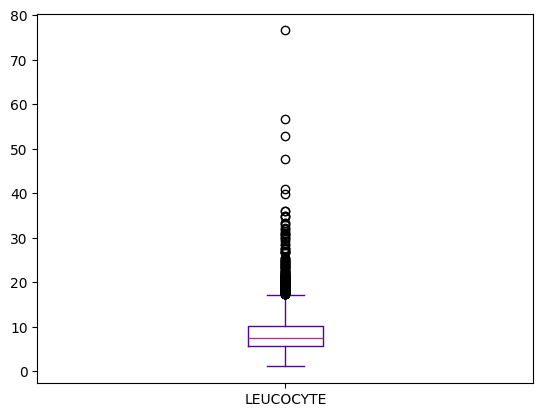

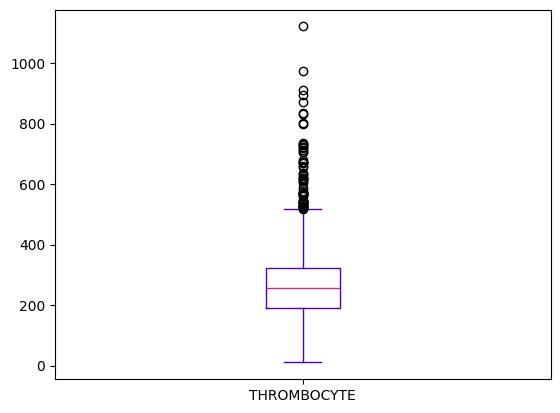

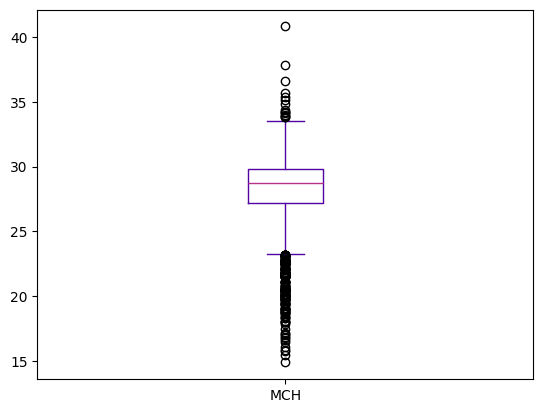

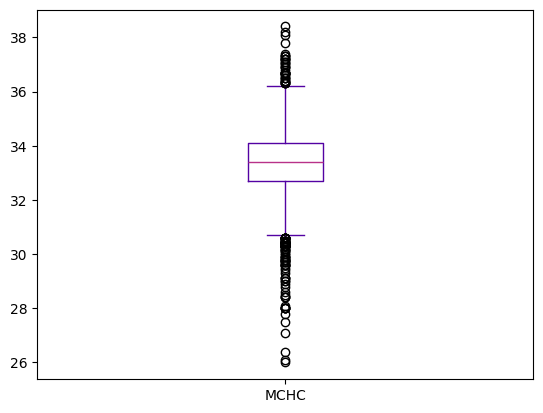

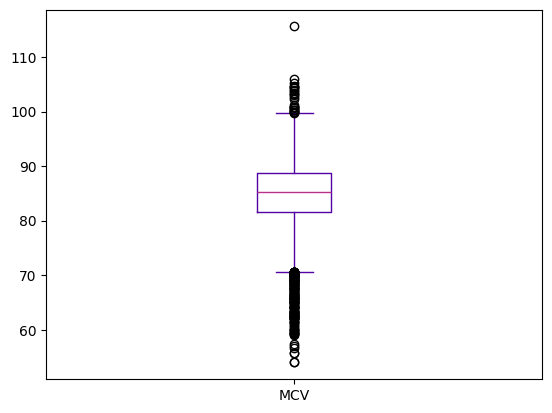

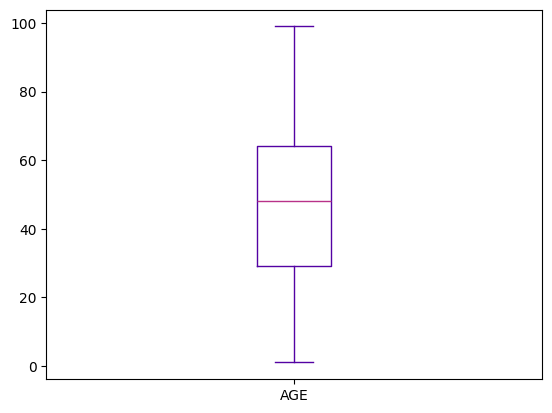

In [39]:
# Checking Outlier's
for i in df.drop(columns = ['SEX','SOURCE']):
    df[i].plot(kind='box')
    plt.show()

# In Our Dataset there are numerous amount of outliers but we won't treat them beacuse based on them we will able to find which patient is in care or not.

In [41]:
# Encoding SEX columns to numerical

df['SEX'].unique()
s = {'M':1,'F':0}
df['SEX'] = df['SEX'].map(s)

In [42]:
df.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,0,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,1,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,0,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,0,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,1,0


In [63]:
# Dividing Dataset independent and Dependent variable

X = df.iloc[:,:-1]
X
y = df.iloc[:,-1]
y



0       1
1       0
2       0
3       0
4       0
       ..
3304    1
3305    1
3306    0
3307    0
3308    1
Name: SOURCE, Length: 3309, dtype: int64

In [83]:
# Divinding Dataset into Trianing ans Testing sets

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state = 42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2978, 10), (331, 10), (2978,), (331,))

In [84]:
from sklearn.preprocessing import StandardScaler

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [85]:
# Importing All the Required Classification models

from sklearn.linear_model import LogisticRegression,RidgeCV,LassoCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [86]:
model = {
    "LogisticRegression":LogisticRegression(C=12,solver='lbfgs'),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "KNeighborsClassifier":KNeighborsClassifier(),
    "Support_Vector_Machine":SVC(),
    "GaussianNB":GaussianNB(),
    "RandomForestClassifier":RandomForestClassifier(),
    "ExtraTreesClassifier":ExtraTreesClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier()
}

LogisticRegression provide accuracy of 0.7220543806646526


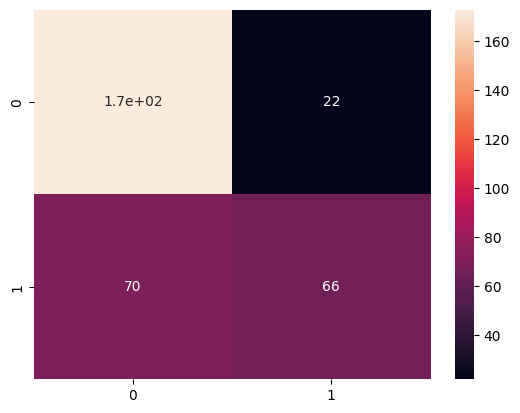

              precision    recall  f1-score   support

           0       0.71      0.89      0.79       195
           1       0.75      0.49      0.59       136

    accuracy                           0.72       331
   macro avg       0.73      0.69      0.69       331
weighted avg       0.73      0.72      0.71       331

DecisionTreeClassifier provide accuracy of 0.6586102719033232


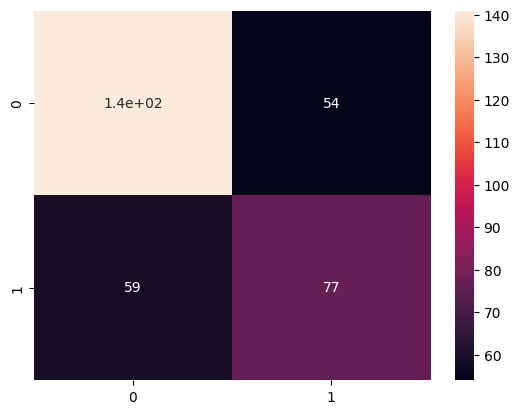

              precision    recall  f1-score   support

           0       0.70      0.72      0.71       195
           1       0.59      0.57      0.58       136

    accuracy                           0.66       331
   macro avg       0.65      0.64      0.65       331
weighted avg       0.66      0.66      0.66       331

KNeighborsClassifier provide accuracy of 0.7552870090634441


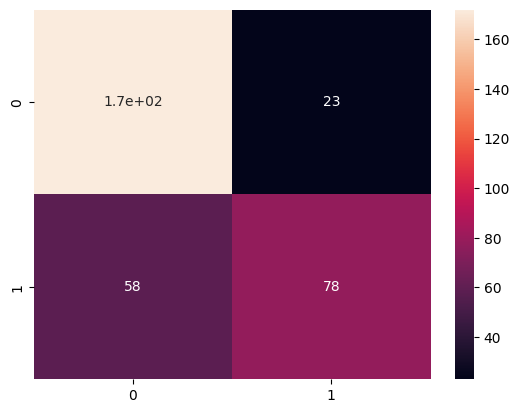

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       195
           1       0.77      0.57      0.66       136

    accuracy                           0.76       331
   macro avg       0.76      0.73      0.73       331
weighted avg       0.76      0.76      0.75       331

Support_Vector_Machine provide accuracy of 0.7492447129909365


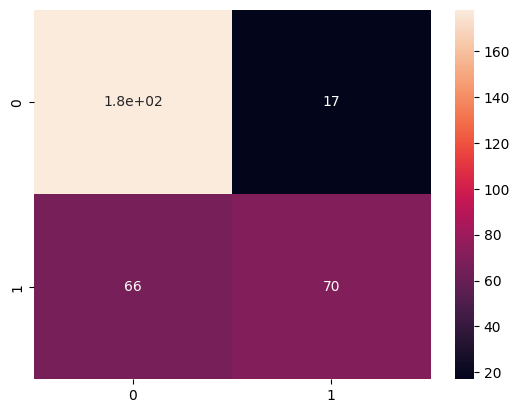

              precision    recall  f1-score   support

           0       0.73      0.91      0.81       195
           1       0.80      0.51      0.63       136

    accuracy                           0.75       331
   macro avg       0.77      0.71      0.72       331
weighted avg       0.76      0.75      0.74       331

GaussianNB provide accuracy of 0.6978851963746223


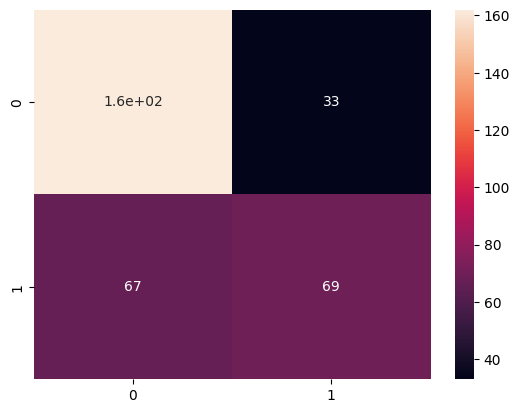

              precision    recall  f1-score   support

           0       0.71      0.83      0.76       195
           1       0.68      0.51      0.58       136

    accuracy                           0.70       331
   macro avg       0.69      0.67      0.67       331
weighted avg       0.69      0.70      0.69       331

RandomForestClassifier provide accuracy of 0.7371601208459214


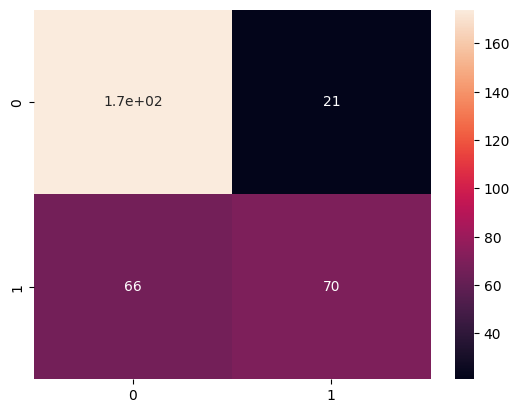

              precision    recall  f1-score   support

           0       0.72      0.89      0.80       195
           1       0.77      0.51      0.62       136

    accuracy                           0.74       331
   macro avg       0.75      0.70      0.71       331
weighted avg       0.74      0.74      0.72       331

ExtraTreesClassifier provide accuracy of 0.7462235649546828


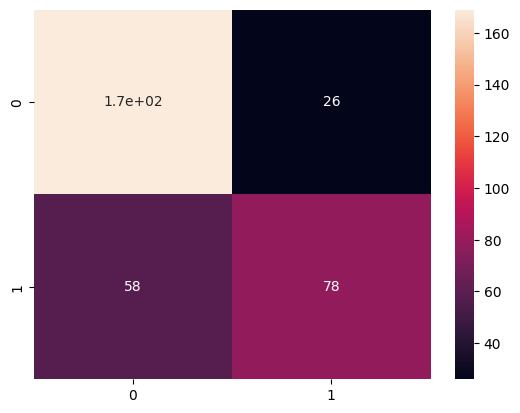

              precision    recall  f1-score   support

           0       0.74      0.87      0.80       195
           1       0.75      0.57      0.65       136

    accuracy                           0.75       331
   macro avg       0.75      0.72      0.73       331
weighted avg       0.75      0.75      0.74       331



d:\Data Science\Project\Patient's Classification\myenv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier provide accuracy of 0.7311178247734139


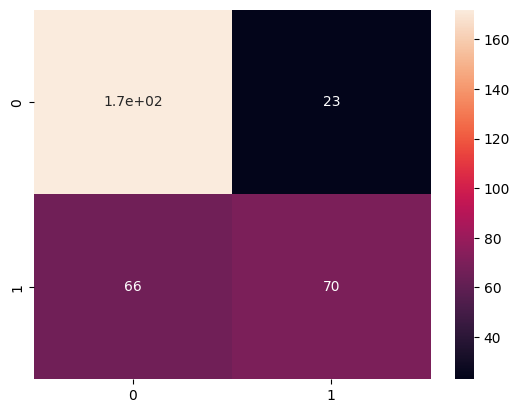

              precision    recall  f1-score   support

           0       0.72      0.88      0.79       195
           1       0.75      0.51      0.61       136

    accuracy                           0.73       331
   macro avg       0.74      0.70      0.70       331
weighted avg       0.74      0.73      0.72       331



In [87]:
for name,md in model.items():
    md.fit(X_train,y_train)
    y_pred = md.predict(X_test)
    print(f"{name} provide accuracy of {accuracy_score(y_test,y_pred)}")

    conf = confusion_matrix(y_test,y_pred)
    sns.heatmap(conf,annot=True)
    plt.show()
    print(classification_report(y_test,y_pred))
    

In [92]:
Rf = RandomForestClassifier()
Rf.fit(X_train,y_train)
y_pre = Rf.predict(X_train)
print(accuracy_score(y_test,y_pred))

0.7311178247734139


In [93]:
import joblib

joblib.dump(Rf,"random.pkl")

['random.pkl']

In [95]:
model = joblib.load("random.pkl")